In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Task -1: Data prepartion

# 1.Load the dataset into a pandas data frame (train and test).

In [2]:
train=pd.read_csv("DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv",index_col='date',parse_dates=['date'])
test=pd.read_csv("DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv",index_col='date',parse_dates=['date'])

In [3]:
train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [4]:
train.shape

(1462, 4)

In [4]:
train.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [5]:
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [6]:
test.shape

(114, 4)

In [7]:
test.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [8]:
df1=pd.concat([train,test])
df1

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


# 2. Perform some visual inspections of the data.

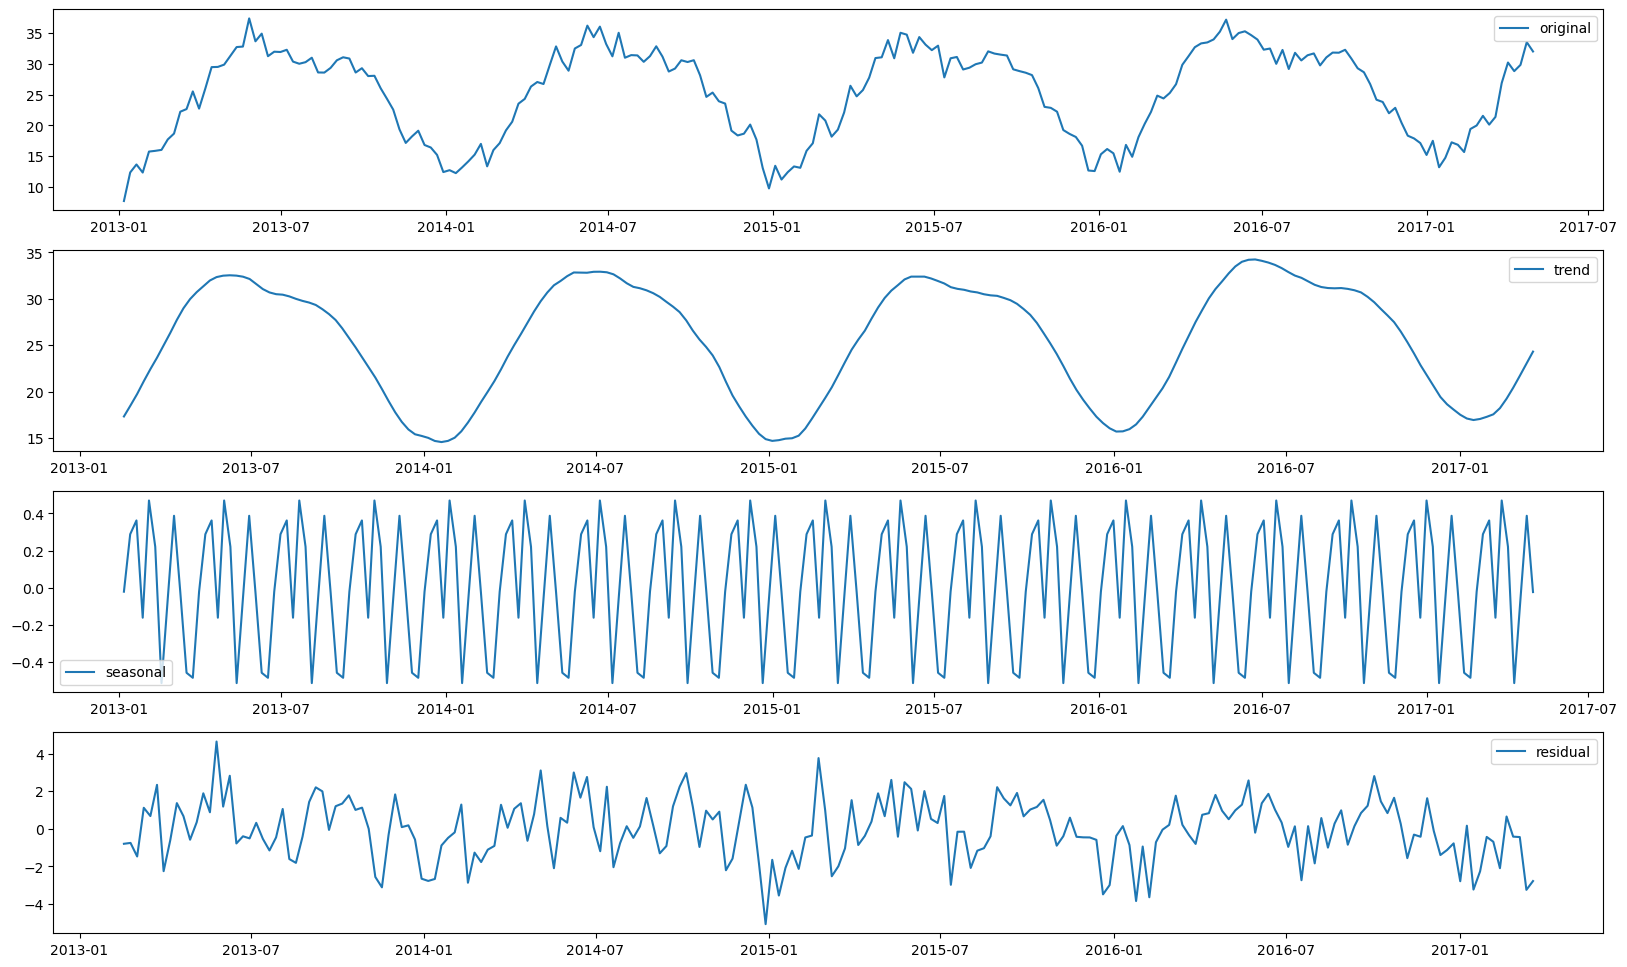

In [30]:
decomposition=seasonal_decompose(resample_data,period=12)

d_seasonal=decomposition.seasonal
d_trend=decomposition.trend
d_residual=decomposition.resid

fig,ax=plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(resample_data,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='residual')
plt.legend(loc='best')

# 3.Sample the data with respect to 7 days.

In [19]:
week_resample=df1.resample('w').mean()
week_resample

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-06,7.705556,84.077778,2.337778,1017.300000
2013-01-13,12.343537,65.145238,8.825170,1016.632653
2013-01-20,13.642857,81.663265,4.242857,1017.139456
2013-01-27,12.329592,67.748299,4.770544,1020.337075
2013-02-03,15.736905,67.667347,2.337194,1017.020578
...,...,...,...,...
2017-04-02,30.203515,36.735544,10.218594,1007.073980
2017-04-09,28.805189,30.570238,10.904628,1006.816270
2017-04-16,29.820862,27.801304,8.387557,1005.399093


In [22]:
resample_data=week_resample['meantemp']
resample_data

date
2013-01-06     7.705556
2013-01-13    12.343537
2013-01-20    13.642857
2013-01-27    12.329592
2013-02-03    15.736905
                ...    
2017-04-02    30.203515
2017-04-09    28.805189
2017-04-16    29.820862
2017-04-23    33.511508
2017-04-30    32.000000
Freq: W-SUN, Name: meantemp, Length: 226, dtype: float64

# 4.Split the data into train and test parts into a 70:30 ratio.

In [23]:
aa=int(0.7*len(resample_data))
train=resample_data.iloc[:aa]
test=resample_data.iloc[aa:]
print('train={}, test={}'.format(len(train),len(test)))

train=158, test=68


# 5.Check for Stationarity.

In [24]:
def checkstationarity(resample_data):
    pvalue=adfuller(resample_data)[1]
    if pvalue>0.05:
        print='pvalue={}, Data is not stationarity'.format(pvalue)
    else:
         print='pvalue={},Data is stationarity'.format(pvalue)
    return(print)

In [25]:
checkstationarity(resample_data)

'pvalue=5.224837272985142e-06,Data is stationarity'

Text(0.5, 1.0, 'AutoCorrelation')

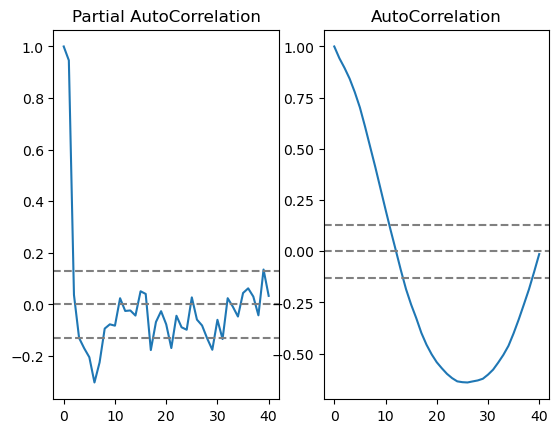

In [27]:
# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(resample_data, nlags=40)
lag_pacf = pacf(resample_data, nlags=40, method="ols")

# plot PACF (p)

plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(resample_data)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(resample_data)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(resample_data)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(resample_data)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

# 6.Plot ACF and PACF.

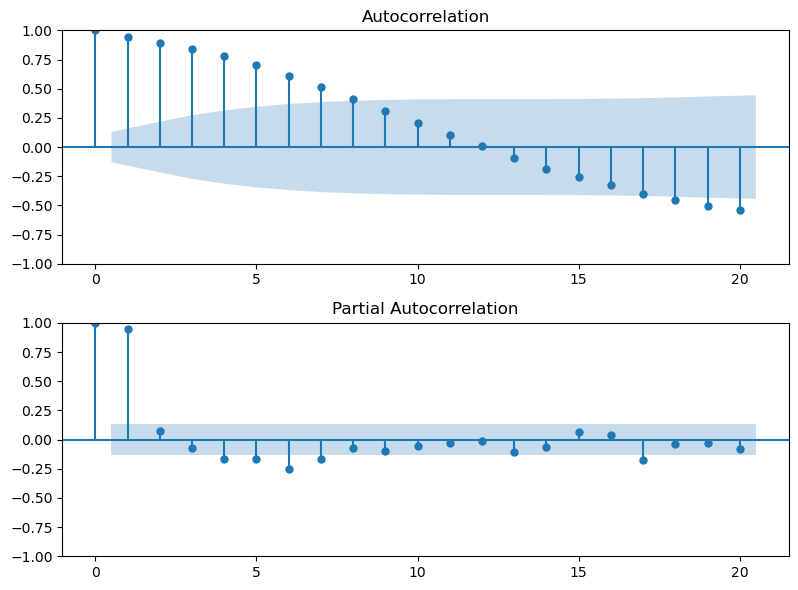

In [28]:
import statsmodels.api as sm
fig = plt.figure(figsize = (8,6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(resample_data, lags=20, ax = ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(resample_data, lags=20, ax = ax2)
plt.tight_layout()

The lag values are in acf is 11 and the lag values in pacf is 6.

# Task-2: Bulid the ARIMA Model.

# 1.Define functions to bulid the ARIMA model and predict temperatures.

In [31]:
p=0;d=1;q=0
m1=ARIMA(resample_data,order=(p,d,q)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  226
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -486.071
Date:                Wed, 13 Sep 2023   AIC                            974.143
Time:                        11:48:18   BIC                            977.559
Sample:                    01-06-2013   HQIC                           975.522
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.4051      0.465      9.482      0.000       3.494       5.316
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                 1.56
Prob(Q):                              0.41   Prob(JB):                         0.46
Heteroskedasticity (H):               0.99   Skew:                             0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
p=1;d=0;q=1
m1=ARIMA(resample_data,order=(p,d,q)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  226
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -487.951
Date:                Wed, 13 Sep 2023   AIC                            983.902
Time:                        11:48:26   BIC                            997.584
Sample:                    01-06-2013   HQIC                           989.424
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1124      3.350      7.198      0.000      17.547      30.678
ar.L1          0.9684      0.017     57.563      0.000       0.935       1.001
ma.L1         -0.0281      0.068     -0.413      0.680      -0.162       0.105
sigma2         4.3415      0.457      9.510      0.000       3.447       5.236
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.61   Prob(JB):                         0.51
Heteroskedasticity (H):               0.96   Skew:                            -0.04
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
p=2;d=1;q=1
m1=ARIMA(resample_data,order=(p,d,q)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  226
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -476.975
Date:                Wed, 13 Sep 2023   AIC                            961.951
Time:                        11:48:38   BIC                            975.615
Sample:                    01-06-2013   HQIC                           967.466
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6342      0.111      5.692      0.000       0.416       0.853
ar.L2          0.2356      0.070      3.345      0.001       0.098       0.374
ma.L1         -0.7328      0.108     -6.761      0.000      -0.945      -0.520
sigma2         4.0583      0.419      9.689      0.000       3.237       4.879
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 1.00
Prob(Q):                              0.66   Prob(JB):                         0.61
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretion

AIC score of ARIMA of model(1) is 5648.181

AIC score of ARIMA of model(2) is 5602.211

AIC score of ARIMA of model(3) is 5544.118

Lesser the AIC score is better the model. Hence ARIMA(2,1,1) is the better model.


# Predict the test data using the model

In [34]:
start = len(train)
end = len(train) + len(test) -1

print("start = {}, end = {}".format(start,end))

predictions = m1.predict(start, end, typ = "levels")
predictions

start = 158, end = 225


date
2016-01-17    15.870173
2016-01-24    15.517385
2016-01-31    12.639003
2016-02-07    15.816630
2016-02-14    15.370399
                ...    
2017-04-02    26.678484
2017-04-09    31.030142
2017-04-16    30.333603
2017-04-23    30.511369
2017-04-30    33.893109
Freq: W-SUN, Name: predicted_mean, Length: 68, dtype: float64

# calculating actual, predicted and error values.

In [35]:
actual = []
pred = []
for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['error'] = df_res.actual - df_res.predicted
df_res

,actual,predicted,error
0,15.454167,15.870173,-0.416006
1,12.462330,15.517385,-3.055055
2,16.821429,12.639003,4.182425
3,14.889494,15.816630,-0.927136
4,18.084357,15.370399,2.713958
...,...,...,...
63,30.203515,26.678484,3.525031
64,28.805189,31.030142,-2.224953
65,29.820862,30.333603,-0.512742
66,33.511508,30.511369,3.000139


<AxesSubplot:>

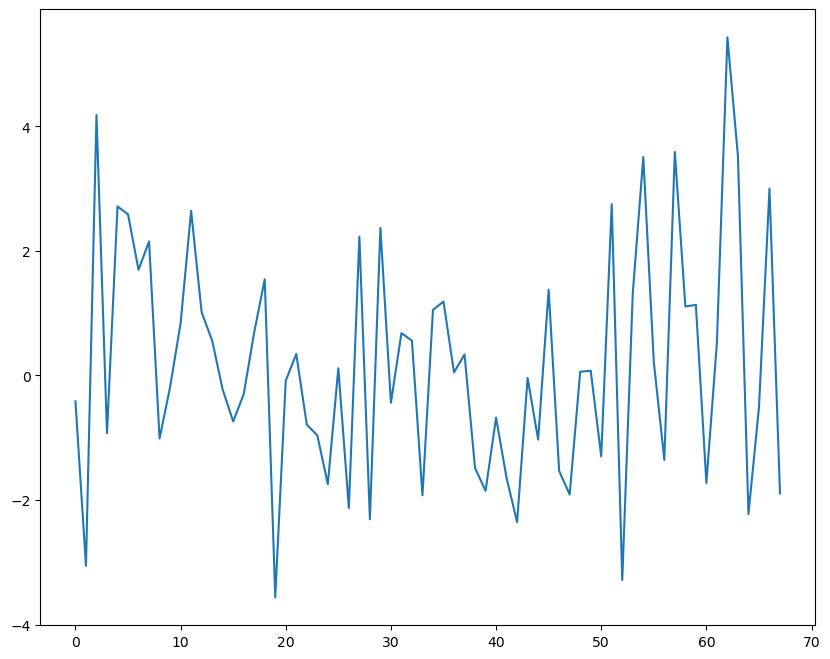

In [36]:
df_res.error.plot(figsize=(10,8))

# Perform the LJung-Box test.

In [37]:
pvalue=sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue<0.05:
    print('Reject H0. Bad model')
else:
    print('Fail to Reject H0. Good model')

Fail to Reject H0. Good model


# Calculate MSE and RMSE of the Model from the test.

In [38]:
# MSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(2,1)
	MSE = 3.6149220638165795
	RMSE = 1.901294838739268


# Plot actual vs. predicted values

Text(0.5, 1.0, 'ARMA Model. Order=(2,1)')

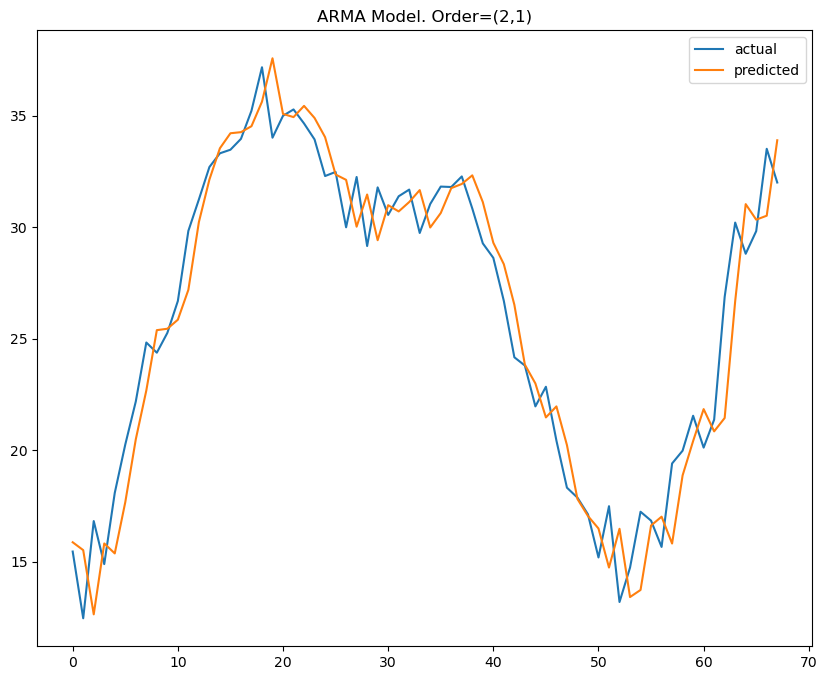

In [39]:
df_res.actual.plot(figsize = (10,8), legend = True)
df_res.predicted.plot(legend = True)
plt.title(msg)

# Forecast using the model.

In [40]:
fcast = m1.predict(start = len(resample_data), end = len(resample_data) + 11, typ = "levels")
fcast.head()

2017-05-07    33.297928
2017-05-14    33.765070
2017-05-21    34.367093
2017-05-28    34.858960
2017-06-04    35.312735
Freq: W-SUN, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'ARMA Model. Order=(2,1)')

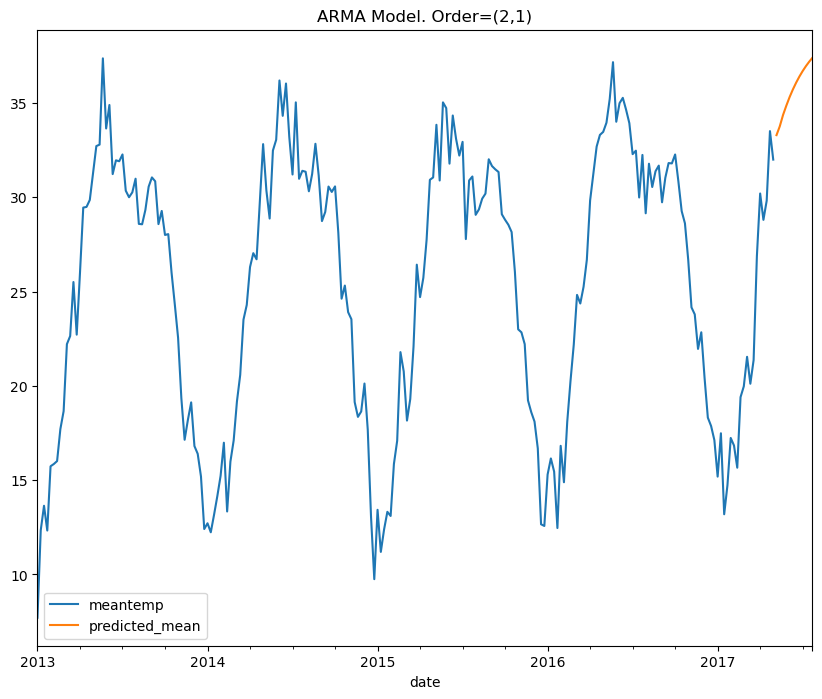

In [42]:
resample_data.plot(figsize = (10,8), legend = True)
fcast.plot(legend = True)
plt.title(msg)

# Task-3: Bulid the SARIMA Model.

# 2.Bulid the SARIMA Model.

In [43]:
# for seasonal data, use the SARIMAX. start with initial values for p,d,q

p = 1; q= 2; d=1

r1 = sm.tsa.statespace.SARIMAX(resample_data, order = (p,d,q), seasonal_order=(p,d,q,12)).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                  226
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -463.532
Date:                            Wed, 13 Sep 2023   AIC                            941.064
Time:                                    11:51:29   BIC                            964.593
Sample:                                01-06-2013   HQIC                           950.572
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8957      0.069     12.991      0.000       0.761       1.031
ma.L1         -1.1043      0.093    -11.868      0.000      -1.287      -0.922
ma.L2          0.3542      0.068      5.232      0.000       0.222       0.487
ar.S.L12      -0.9655      0.428     -2.255      0.024      -1.805      -0.126
ma.S.L12      -0.0009    459.950  -2.02e-06      1.000    -901.486     901.485
ma.S.L24      -0.9991    459.076     -0.002      0.998    -900.771     898.773
sigma2         3.8054   1748.685      0.002      0.998   -3423.555    3431.166
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.53   Prob(JB):                         0.65
Heteroskedasticity (H):               0.83   Skew:                            -0.06
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
p = 1; q= 2; d=3

r1 = sm.tsa.statespace.SARIMAX(resample_data, order = (p,d,q), seasonal_order=(p,d,q,12)).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                  226
Model:             SARIMAX(1, 3, 2)x(1, 3, 2, 12)   Log Likelihood                -524.718
Date:                            Wed, 13 Sep 2023   AIC                           1063.435
Time:                                    11:52:33   BIC                           1086.053
Sample:                                01-06-2013   HQIC                          1072.600
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3031      0.090     -3.383      0.001      -0.479      -0.127
ma.L1         -1.7597      0.451     -3.903      0.000      -2.643      -0.876
ma.L2          0.7604      0.334      2.273      0.023       0.105       1.416
ar.S.L12      -0.6943      0.094     -7.412      0.000      -0.878      -0.511
ma.S.L12      -0.9668    123.038     -0.008      0.994    -242.118     240.184
ma.S.L24      -0.0331      4.154     -0.008      0.994      -8.175       8.108
sigma2         5.4814    674.223      0.008      0.994   -1315.972    1326.935
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.67   Prob(JB):                         0.94
Heteroskedasticity (H):               0.80   Skew:                            -0.06
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
p = 2; q= 4; d=2

r1 = sm.tsa.statespace.SARIMAX(resample_data, order = (p,d,q), seasonal_order=(p,d,q,12)).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                  226
Model:             SARIMAX(2, 2, 4)x(2, 2, 4, 12)   Log Likelihood                -474.570
Date:                            Wed, 13 Sep 2023   AIC                            975.140
Time:                                    11:52:12   BIC                           1018.018
Sample:                                01-06-2013   HQIC                           992.492
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0840      0.184     -0.458      0.647      -0.444       0.276
ar.L2         -0.7117      0.189     -3.774      0.000      -1.081      -0.342
ma.L1         -1.0635      0.170     -6.268      0.000      -1.396      -0.731
ma.L2          0.9786      0.214      4.568      0.000       0.559       1.399
ma.L3         -0.9121      0.192     -4.744      0.000      -1.289      -0.535
ma.L4          0.4244      0.085      4.991      0.000       0.258       0.591
ar.S.L12      -1.6865      0.621     -2.715      0.007      -2.904      -0.469
ar.S.L24      -0.9021      0.679     -1.328      0.184      -2.234       0.430
ma.S.L12      -0.1904      1.532     -0.124      0.901      -3.194       2.813
ma.S.L24      -1.3789      1.000     -1.378      0.168      -3.339       0.582
ma.S.L36      -0.1422      1.512     -0.094      0.925      -3.106       2.821
ma.S.L48       0.9391      1.337      0.703      0.482      -1.681       3.559
sigma2         4.3906      5.260      0.835      0.404      -5.919      14.701
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.85   Prob(JB):                         0.70
Heteroskedasticity (H):               0.91   Skew:                             0.02
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretion

AIC score of ARIMA of model(1) is 5561.954

AIC score of ARIMA of model(2) is 6797.917

AIC score of ARIMA of model(3) is 5643.675

Lesser the AIC score is better the model. Hence ARIMA(1,2,1) is the better model

# Predict the sales figures using test data.

In [46]:
# predictions

start = len(train)
end = len(train) + len(test) -1

print("start = {}, end = {}".format(start,end))

predictions = r1.predict(start, end, typ = "levels")
predictions

start = 158, end = 225


date
2016-01-17    13.532455
2016-01-24    11.741488
2016-01-31    13.456555
2016-02-07    17.446274
2016-02-14    15.502673
                ...    
2017-04-02    29.031933
2017-04-09    27.336767
2017-04-16    32.268435
2017-04-23    33.997992
2017-04-30    34.747417
Freq: W-SUN, Name: predicted_mean, Length: 68, dtype: float64

# Finding actual, predicted and errors together.

In [47]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['Error'] = df_res.actual - df_res.predicted
print(df_res)

       actual  predicted     Error
0   15.454167  13.532455  1.921712
1   12.462330  11.741488  0.720842
2   16.821429  13.456555  3.364873
3   14.889494  17.446274 -2.556780
4   18.084357  15.502673  2.581684
..        ...        ...       ...
63  30.203515  29.031933  1.171582
64  28.805189  27.336767  1.468423
65  29.820862  32.268435 -2.447573
66  33.511508  33.997992 -0.486484
67  32.000000  34.747417 -2.747417

[68 rows x 3 columns]


# plot the errors.

<AxesSubplot:>

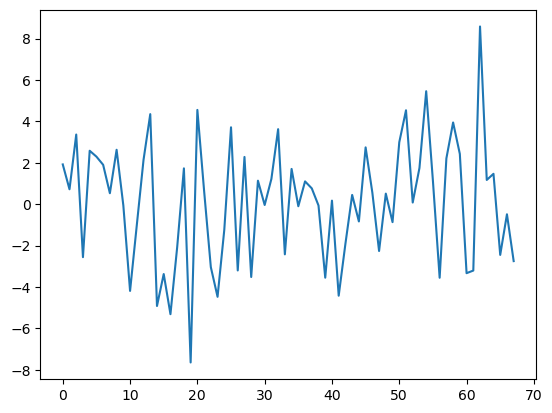

In [48]:
df_res.Error.plot()

# Box-Jenkins test to check model's goodness.

In [49]:
pvalue=sm.stats.acorr_ljungbox(r1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail to reject H0.Good model")

Reject H0. Bad model


# Calculate error terms.

In [50]:
# MSE

msg = "ARIMA model. Order =(" + str(p) + "," + str(d) + "," + str(q) + ")"

mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1, np.sqrt(mse1)))

ARIMA model. Order =(1,3,2)
	MSE = 8.850311557394338
	RMSE = 2.9749473201040617


# Plot actual vs. predicted values.

Text(0.5, 1.0, 'ARIMA model. Order =(1,3,2)')

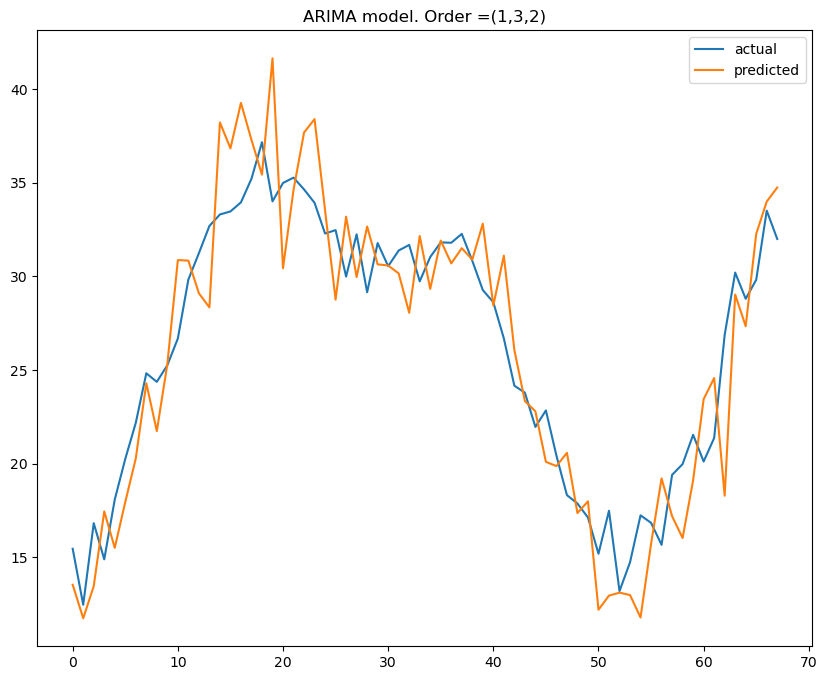

In [51]:
df_res.actual.plot(figsize = (10,8), legend = True)
df_res.predicted.plot(legend = True)
plt.title(msg)

# Forecast using the model.

In [52]:

fcast1 = r1.predict(start = len(resample_data), end = len(resample_data) + 11, typ = "levels")
fcast1.head()

2017-05-07    36.037575
2017-05-14    40.959991
2017-05-21    41.361281
2017-05-28    43.160828
2017-06-04    45.081223
Freq: W-SUN, Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'ARIMA model. Order =(1,3,2)')

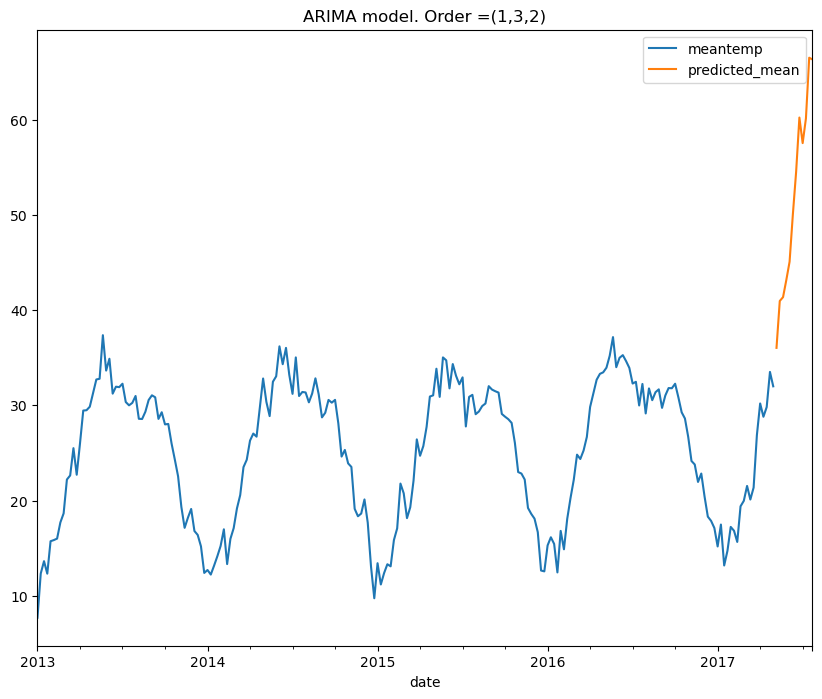

In [53]:
resample_data.plot(figsize = (10,8), legend = True)
fcast1.plot(legend = True)
plt.title(msg)